In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | biala podlaska
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | buin
Processing Record 4 of Set 1 | balasinor
City not found. Skipping...
Processing Record 5 of Set 1 | cockburn town
Processing Record 6 of Set 1 | rolim de moura
City not found. Skipping...
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 12 of Set 1 | tabas
Processing Record 13 of Set 1 | itaituba
Processing Record 14 of Set 1 | kulhudhuffushi
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | wulanhaote
City not found. Skipping...
Processing Record 18 of Set 1 | kholm
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | busselton


Processing Record 34 of Set 4 | kahului
Processing Record 35 of Set 4 | methven
Processing Record 36 of Set 4 | kangasala
Processing Record 37 of Set 4 | maumere
Processing Record 38 of Set 4 | vitim
Processing Record 39 of Set 4 | hasaki
Processing Record 40 of Set 4 | mareeba
Processing Record 41 of Set 4 | alotau
City not found. Skipping...
Processing Record 42 of Set 4 | puerto baquerizo moreno
Processing Record 43 of Set 4 | lasa
Processing Record 44 of Set 4 | nioro
Processing Record 45 of Set 4 | alta gracia
Processing Record 46 of Set 4 | labutta
City not found. Skipping...
Processing Record 47 of Set 4 | ancud
Processing Record 48 of Set 4 | havelock
Processing Record 49 of Set 4 | bytosh
Processing Record 50 of Set 4 | hammerfest
Processing Record 1 of Set 5 | big spring
Processing Record 2 of Set 5 | coihaique
Processing Record 3 of Set 5 | cabo san lucas
Processing Record 4 of Set 5 | opuwo
Processing Record 5 of Set 5 | novouralsk
Processing Record 6 of Set 5 | manggar
Pro

Processing Record 25 of Set 8 | seoul
Processing Record 26 of Set 8 | jasper
Processing Record 27 of Set 8 | alofi
Processing Record 28 of Set 8 | kukushtan
Processing Record 29 of Set 8 | abu zabad
Processing Record 30 of Set 8 | kenai
Processing Record 31 of Set 8 | corn island
Processing Record 32 of Set 8 | qingdao
Processing Record 33 of Set 8 | ober-ramstadt
Processing Record 34 of Set 8 | husavik
Processing Record 35 of Set 8 | jiddah
City not found. Skipping...
Processing Record 36 of Set 8 | cape canaveral
Processing Record 37 of Set 8 | vanavara
Processing Record 38 of Set 8 | warqla
City not found. Skipping...
Processing Record 39 of Set 8 | manaure
Processing Record 40 of Set 8 | gillette
Processing Record 41 of Set 8 | port macquarie
Processing Record 42 of Set 8 | waipawa
Processing Record 43 of Set 8 | methoni
Processing Record 44 of Set 8 | jiaocheng
Processing Record 45 of Set 8 | mocambique
City not found. Skipping...
Processing Record 46 of Set 8 | hualmay
Processing

Processing Record 12 of Set 12 | karlskrona
Processing Record 13 of Set 12 | longkou
Processing Record 14 of Set 12 | changde
Processing Record 15 of Set 12 | evanston
Processing Record 16 of Set 12 | arkhangelos
City not found. Skipping...
Processing Record 17 of Set 12 | machachi
Processing Record 18 of Set 12 | estepona
Processing Record 19 of Set 12 | ixtapa
Processing Record 20 of Set 12 | nacala
Processing Record 21 of Set 12 | inongo
Processing Record 22 of Set 12 | meyungs
City not found. Skipping...
Processing Record 23 of Set 12 | marcona
City not found. Skipping...
Processing Record 24 of Set 12 | irupi
Processing Record 25 of Set 12 | talakan
Processing Record 26 of Set 12 | el balyana
City not found. Skipping...
Processing Record 27 of Set 12 | ormara
Processing Record 28 of Set 12 | koslan
Processing Record 29 of Set 12 | batemans bay
Processing Record 30 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 31 of Set 12 | gemena
Processing Record 32 of S

In [8]:
len(city_data)

538

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Biala Podlaska,52.0324,23.1165,50.04,51,8,7.18,PL,2021-10-09 15:00:49
1,Bluff,-46.6000,168.3333,43.81,92,68,8.84,NZ,2021-10-09 15:00:49
2,Buin,-33.7333,-70.7500,61.74,43,0,6.91,CL,2021-10-09 15:00:50
3,Cockburn Town,21.4612,-71.1419,82.74,75,99,13.18,TC,2021-10-09 14:57:22
4,Arraial Do Cabo,-22.9661,-42.0278,67.48,72,100,11.39,BR,2021-10-09 15:00:50
5,Hobart,-42.8794,147.3294,49.26,70,40,3.00,AU,2021-10-09 15:00:51
6,Rikitea,-23.1203,-134.9692,74.17,80,7,17.16,PF,2021-10-09 15:00:51
7,Atuona,-9.8000,-139.0333,77.63,71,17,18.03,PF,2021-10-09 15:00:52
8,Tabas,33.5959,56.9244,69.40,25,0,13.78,IR,2021-10-09 15:00:52
9,Itaituba,-4.2761,-55.9836,96.98,36,95,4.45,BR,2021-10-09 15:00:53


In [10]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Biala Podlaska,PL,2021-10-09 15:00:49,52.0324,23.1165,50.04,51,8,7.18
1,Bluff,NZ,2021-10-09 15:00:49,-46.6000,168.3333,43.81,92,68,8.84
2,Buin,CL,2021-10-09 15:00:50,-33.7333,-70.7500,61.74,43,0,6.91
3,Cockburn Town,TC,2021-10-09 14:57:22,21.4612,-71.1419,82.74,75,99,13.18
4,Arraial Do Cabo,BR,2021-10-09 15:00:50,-22.9661,-42.0278,67.48,72,100,11.39


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

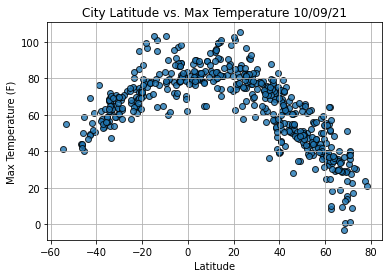

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

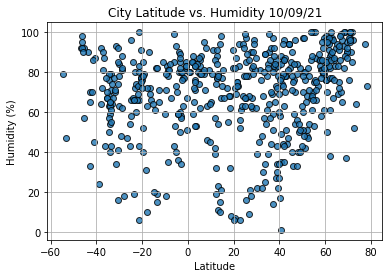

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

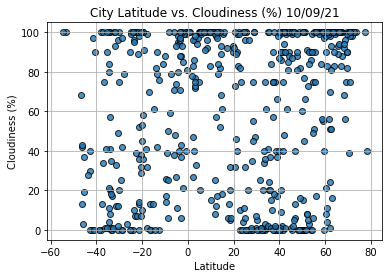

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

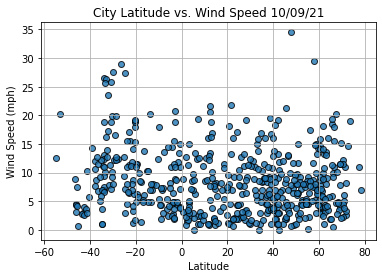

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()